In [25]:
pip install --upgrade scipy

Note: you may need to restart the kernel to use updated packages.


In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew

In [27]:
data = pd.read_csv('Healthcare Providers.csv')

**Data Understanding**

In [28]:
data.shape

(100000, 27)

In [29]:
data.head(10)

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758
5,3443985,1346571551,PUGH,JOHN,R,DPT,M,I,504 ALBEMARLE SQ,NaN,...,97016,Application of blood vessel compression or dec...,N,192,36,192,13.550989583,63.1125,9.6764583333,10.506927083
6,2137027,1215943535,BRUMITT,TOM,B,DO,M,I,70 DOCTORS PARK,NaN,...,20610,Aspiration and/or injection of large joint or ...,N,21,19,21,45.971904762,164.57142857,36.036190476,37.77952381
7,6169160,1629160551,GALBREATH,RONALD,G,M.D.,M,I,12522 E. LAMBERT ROAD,SUITE D,...,G0008,Administration of influenza virus vaccine,N,52,50,52,29.33,50,28.74,25.32
8,5086226,1518929124,BOONE,RALPH,M,D.O.,M,I,1215 DUNN AVE,NaN,...,80061,"Blood test, lipids (cholesterol and triglyceri...",N,73,68,73,15.510410959,76,15.197945205,15.197945205
9,3900718,1396781134,METWEST INC,NaN,NaN,NaN,NaN,O,695 S BROADWAY,NaN,...,84392,Urine sulfate (acid) level,N,19,16,19,6.51,29.65,6.38,6.38


In [30]:
data = data.drop(columns=['Middle Initial of the Provider', 
                          'Street Address 1 of the Provider', 
                          'Street Address 2 of the Provider'])

# Display the updated DataFrame
print(data.head())


     index  National Provider Identifier  \
0  8774979                    1891106191   
1  3354385                    1346202256   
2  3001884                    1306820956   
3  7594822                    1770523540   
4   746159                    1073627758   

  Last Name/Organization Name of the Provider First Name of the Provider  \
0                                 UPADHYAYULA                  SATYASREE   
1                                       JONES                      WENDY   
2                                    DUROCHER                    RICHARD   
3                                     FULLARD                     JASPER   
4                                    PERROTTI                    ANTHONY   

  Credentials of the Provider Gender of the Provider  \
0                        M.D.                      F   
1                        M.D.                      F   
2                         DPM                      M   
3                          MD                      M  

In [31]:
data.isnull()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
data.isnull().sum()

index                                                          0
National Provider Identifier                                   0
Last Name/Organization Name of the Provider                    0
First Name of the Provider                                  4255
Credentials of the Provider                                 7209
Gender of the Provider                                      4254
Entity Type of the Provider                                    0
City of the Provider                                           0
Zip Code of the Provider                                       0
State Code of the Provider                                     0
Country Code of the Provider                                   0
Provider Type                                                  0
Medicare Participation Indicator                               0
Place of Service                                               0
HCPCS Code                                                     0
HCPCS Description        

***Z-SCORE**

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



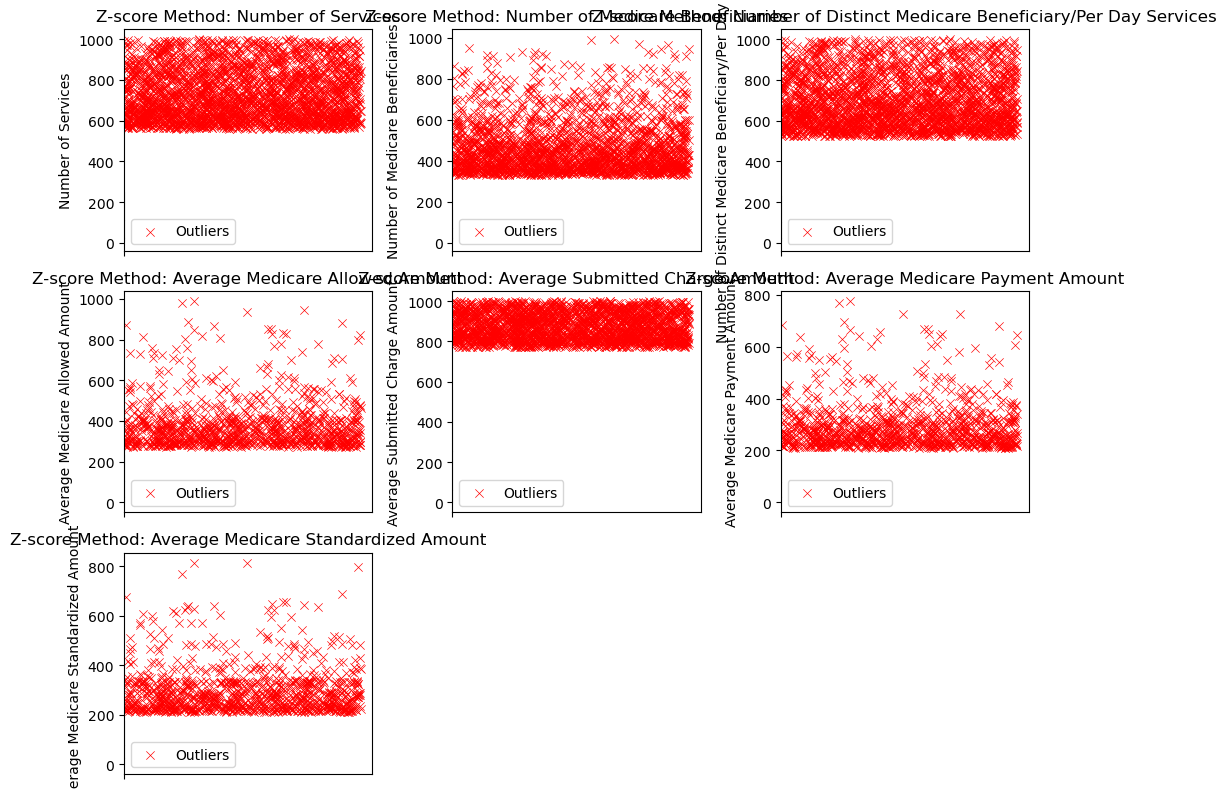

In [33]:
df = pd.DataFrame(data)
selected_columns = [
    'Number of Services', 'Number of Medicare Beneficiaries', 
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount', 'Average Submitted Charge Amount', 
    'Average Medicare Payment Amount', 'Average Medicare Standardized Amount'
]

# Check for non-numeric values
print("Non-numeric values in each column:")
for column in selected_columns:
    non_numeric = df[column][~df[column].apply(lambda x: isinstance(x, (int, float)))]
    if not non_numeric.empty:
        print(f"{column}: {non_numeric.tolist()}")

# Clean the selected columns by converting to numeric
df_selected = df[selected_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
df_selected = df_selected.dropna()

# Z-Score method for detecting outliers
z_scores = np.abs(stats.zscore(df_selected))
df_no_outliers_z = df_selected[(z_scores <= 3).all(axis=1)]  # Keep only non-outliers

# --- Visualization ---

# Boxplot for Z-score method (highlighting removed outliers)
plt.figure(figsize=(10, 8))
for i, column in enumerate(df_selected.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_selected[column], color='skyblue', fliersize=0)  # Original data
    sns.scatterplot(y=df_selected.loc[(z_scores > 3)[column], column], x=df_selected.index[(z_scores > 3)[column]], 
                    color='red', marker='x', label='Outliers')  # Outliers in red
    plt.title(f"Z-score Method: {column}")

plt.tight_layout()
plt.show()


**IQR**

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Average Medicare Standardized Amount: ['160.90888889', '135.31525714', '60.5959375', '3.43', '19.057575758', '10.506927083', '37.77952381', '25.32', '15.197945205', '6.38', '99.917798165', '6.949', '6.7114285714', '177.82037736', '122.19126984', '65.093913043', '41.176071429', '28.406190476', '60.288125', '86.527213115', '30.051666667', '106.71509091', '60.934558824', '5.4934782609', '47.365357143', '27.164477612', '183.58791667', '11.009223301', '3.43', '57.399664804', '60.579384058', '129.00555556', '48.981230769', '25.107410714', '16.11', '21.38', '15.49', '72.928333333', '62.273793103', '18.75969697', '18.65', '103.38105263', '81.249859155', '13.05', '23.113846154', '85.82', '41.443913043', '84.13', '26.292', '0.07825', '50.639333333', '18.57', '116.71473684', '3.43', '83.879583333', '40.863617021', '26.181666667', '11.82', '82.623232759', '45.30375', '18.067222222', '40.353614679', '7.5844594595', '28.18', '79.245652174', '48.166136364', '99.893789474', '61.009534884', '31.2810344

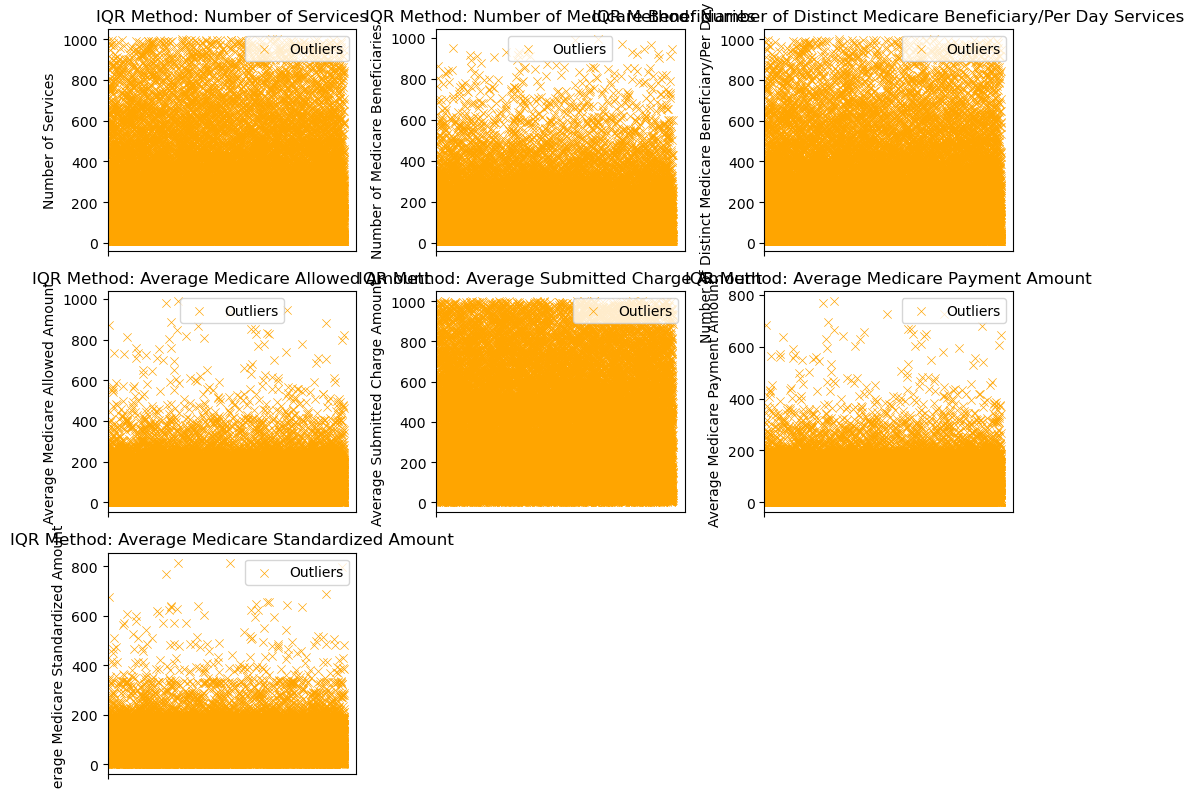

In [34]:
df = pd.DataFrame(data)

# Select only the columns of interest for outlier detection
selected_columns = [
    'Number of Services', 'Number of Medicare Beneficiaries', 
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount', 'Average Submitted Charge Amount', 
    'Average Medicare Payment Amount', 'Average Medicare Standardized Amount'
]

# Check for non-numeric values
print("Non-numeric values in each column:")
for column in selected_columns:
    non_numeric = df[column][~df[column].apply(lambda x: isinstance(x, (int, float)))]
    if not non_numeric.empty:
        print(f"{column}: {non_numeric.tolist()}")

# Clean the selected columns by converting to numeric
df_selected = df[selected_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
df_selected = df_selected.dropna()

# IQR method for detecting outliers
Q1 = df_selected.quantile(0.25)
Q3 = df_selected.quantile(0.65)
IQR = Q3 - Q1

# Define outliers based on IQR
outliers_iqr = df_selected[((df_selected < (Q1 - 1.5 * IQR)) | (df_selected > (Q3 + 1.5 * IQR))).any(axis=1)]
df_no_outliers_iqr = df_selected[~df_selected.index.isin(outliers_iqr.index)]  # Keep only non-outliers

# --- Visualization ---

# Boxplot for IQR method (highlighting removed outliers)
plt.figure(figsize=(10, 8))
for i, column in enumerate(df_selected.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_selected[column], color='skyblue', fliersize=0)  # Original data
    sns.scatterplot(y=outliers_iqr[column], x=outliers_iqr.index, color='orange', marker='x', label='Outliers')  # Outliers in orange
    plt.title(f"IQR Method: {column}")

plt.tight_layout()
plt.show()


***WINZORIZATION***

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



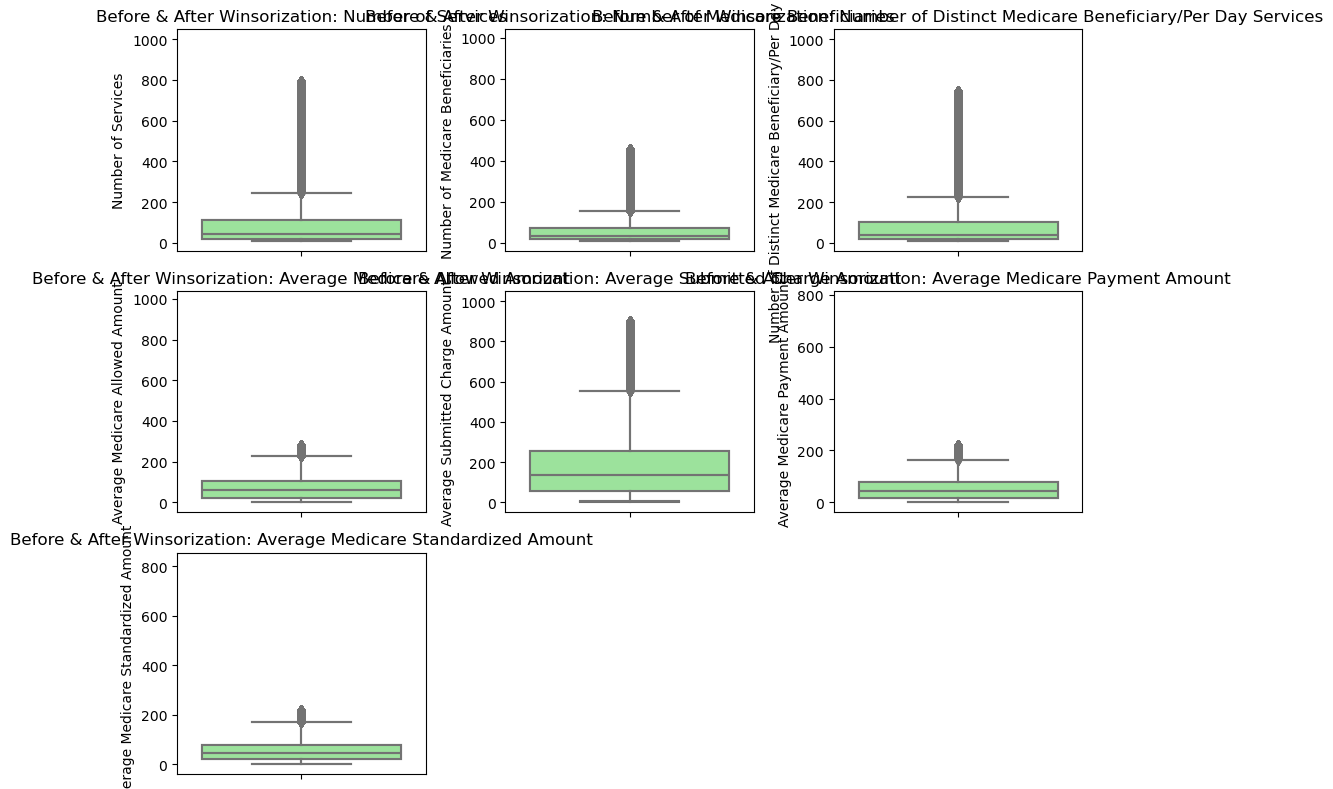

In [35]:
# Select only the columns of interest for outlier detection
selected_columns = [
    'Number of Services', 'Number of Medicare Beneficiaries', 
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount', 'Average Submitted Charge Amount', 
    'Average Medicare Payment Amount', 'Average Medicare Standardized Amount'
]

# Check for non-numeric values
print("Non-numeric values in each column:")
for column in selected_columns:
    non_numeric = df[column][~df[column].apply(lambda x: isinstance(x, (int, float)))]
    if not non_numeric.empty:
        print(f"{column}: {non_numeric.tolist()}")

# Clean the selected columns by converting to numeric
df_selected = df[selected_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
df_selected = df_selected.dropna()

# Winsorization function
def winsorize_series(series, lower_percentile=0.01, upper_percentile=0.99):
    lower_bound = series.quantile(lower_percentile)
    upper_bound = series.quantile(upper_percentile)
    return np.where(series < lower_bound, lower_bound, np.where(series > upper_bound, upper_bound, series))

# Apply Winsorization to the selected columns
df_winsorized = df_selected.copy()
for column in df_selected.columns:
    df_winsorized[column] = winsorize_series(df_selected[column])

# --- Visualization ---

# Boxplots for Winsorized data (to compare before and after)
plt.figure(figsize=(10, 8))
for i, column in enumerate(df_selected.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_selected[column], color='skyblue', fliersize=0)  # Original data
    sns.boxplot(y=df_winsorized[column], color='lightgreen')  # Winsorized data
    plt.title(f"Before & After Winsorization: {column}")

plt.tight_layout()
plt.show()


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



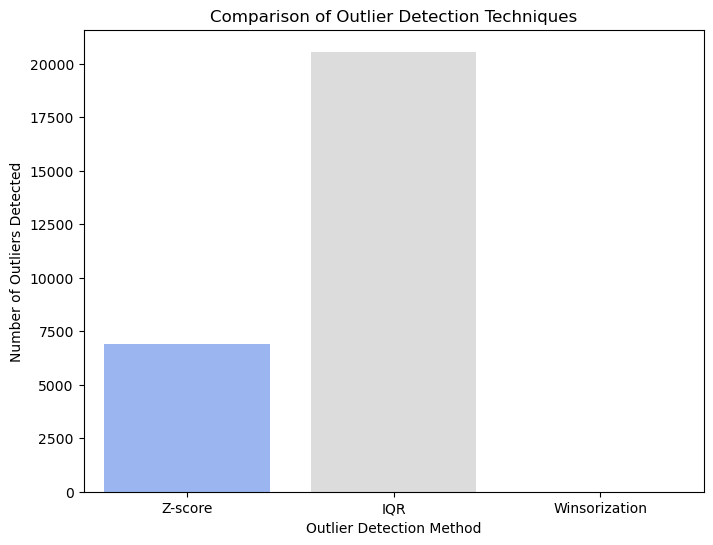

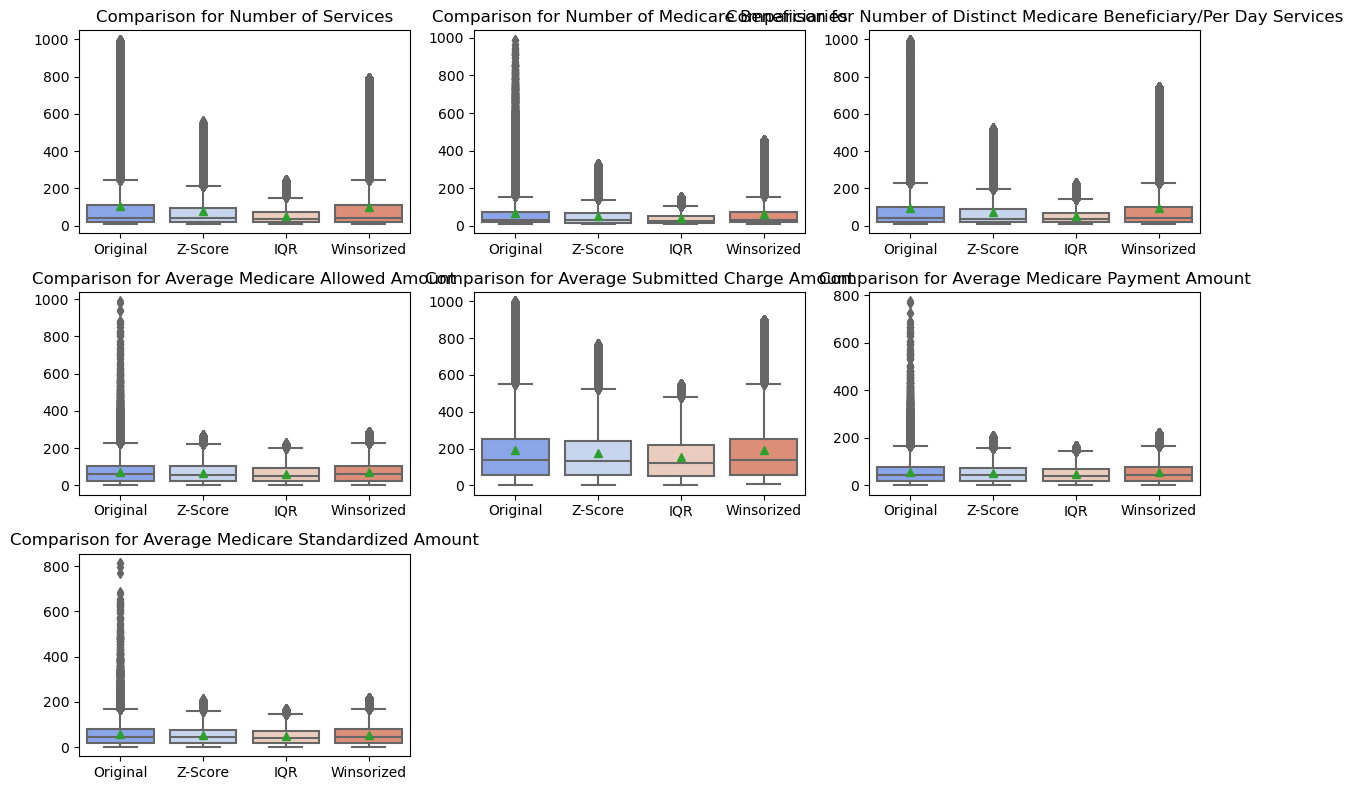

In [36]:
z_scores = np.abs(stats.zscore(df_selected))
outliers_z = df_selected[(z_scores > 3).any(axis=1)]

# --- IQR method for detecting outliers ---
Q1 = df_selected.quantile(0.25)
Q3 = df_selected.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df_selected[((df_selected < (Q1 - 1.5 * IQR)) | (df_selected > (Q3 + 1.5 * IQR))).any(axis=1)]

# --- Winsorization ---
def winsorize_series(series, lower_percentile=0.01, upper_percentile=0.99):
    lower_bound = series.quantile(lower_percentile)
    upper_bound = series.quantile(upper_percentile)
    return np.where(series < lower_bound, lower_bound, np.where(series > upper_bound, upper_bound, series))

df_winsorized = df_selected.copy()
for column in df_selected.columns:
    df_winsorized[column] = winsorize_series(df_selected[column])

# Count the number of outliers detected by each method
num_outliers_z = len(outliers_z)
num_outliers_iqr = len(outliers_iqr)
num_outliers_winsor = len(df_selected) - len(df_winsorized)  # Winsorization reduces extreme values, doesn't drop rows

# --- Visualization ---

# Bar chart comparing the number of outliers detected by each method
methods = ['Z-score', 'IQR', 'Winsorization']
num_outliers = [num_outliers_z, num_outliers_iqr, num_outliers_winsor]

plt.figure(figsize=(8, 6))
sns.barplot(x=methods, y=num_outliers, palette='coolwarm')
plt.xlabel('Outlier Detection Method')
plt.ylabel('Number of Outliers Detected')
plt.title('Comparison of Outlier Detection Techniques')
plt.show()

# Boxplot to compare data distributions after each technique
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_selected.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=[df_selected[column], df_selected[column].loc[df_selected.index.difference(outliers_z.index)], 
                      df_selected[column].loc[df_selected.index.difference(outliers_iqr.index)], df_winsorized[column]], 
                palette='coolwarm', showmeans=True)
    plt.title(f"Comparison for {column}")
    plt.xticks([0, 1, 2, 3], ['Original', 'Z-Score', 'IQR', 'Winsorized'])

plt.tight_layout()
plt.show()


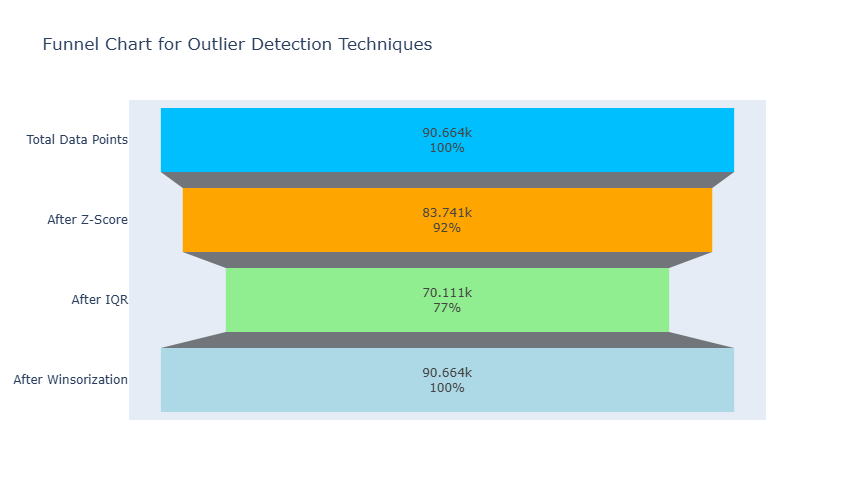

In [37]:
# Calculate remaining data points after each method
total_data_points = len(df_selected)
remaining_z_score = len(df_selected) - num_outliers_z
remaining_iqr = len(df_selected) - num_outliers_iqr
remaining_winsorization = len(df_winsorized)

# Data for the funnel chart
stages = ['Total Data Points', 'After Z-Score', 'After IQR', 'After Winsorization']
values = [total_data_points, remaining_z_score, remaining_iqr, remaining_winsorization]

# Create the funnel chart
fig = go.Figure(go.Funnel(
    y=stages,
    x=values,
    textinfo="value+percent initial",
    marker={"color": ["deepskyblue", "orange", "lightgreen", "lightblue"]}
))

# Update the layout for better presentation
fig.update_layout(
    title="Funnel Chart for Outlier Detection Techniques",
    funnelmode="stack",
    width=700,
    height=500
)

fig.show()


In [38]:
#Normalization
selected_columns = [
    'Number of Services', 'Number of Medicare Beneficiaries', 
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount', 'Average Submitted Charge Amount', 
    'Average Medicare Payment Amount', 'Average Medicare Standardized Amount'
]

# Clean the selected columns by converting to numeric
df_selected = df[selected_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
df_selected = df_selected.dropna()

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
df_normalized_minmax = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns)

# Display the normalized data
print(df_normalized_minmax)


       Number of Services  Number of Medicare Beneficiaries  \
0                0.016194                          0.013265   
1                0.165992                          0.167347   
2                0.021255                          0.002041   
3                0.009109                          0.007143   
4                0.022267                          0.013265   
...                   ...                               ...   
90659            0.009109                          0.009184   
90660            0.126518                          0.097959   
90661            0.000000                          0.000000   
90662            0.001012                          0.001020   
90663            0.585020                          0.066327   

       Number of Distinct Medicare Beneficiary/Per Day Services  \
0                                               0.016194          
1                                               0.165992          
2                                         

***Data Cleaning***

**1. Gender of the Provider**

Gender is categorical, and imputing missing gender data can be done by either using the mode (most frequent value) or a placeholder value like "Unknown". Since gender is binary (usually Male or Female), the mode can be a good imputation strategy.

In [39]:
most_frequent_gender = data['Gender of the Provider'].mode()[0]
data['Gender of the Provider'].fillna(most_frequent_gender, inplace=True)

In [40]:
data.isnull().sum()

index                                                          0
National Provider Identifier                                   0
Last Name/Organization Name of the Provider                    0
First Name of the Provider                                  4255
Credentials of the Provider                                 7209
Gender of the Provider                                         0
Entity Type of the Provider                                    0
City of the Provider                                           0
Zip Code of the Provider                                       0
State Code of the Provider                                     0
Country Code of the Provider                                   0
Provider Type                                                  0
Medicare Participation Indicator                               0
Place of Service                                               0
HCPCS Code                                                     0
HCPCS Description        

In [41]:
# Numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:")
print(numerical_columns)

# Categorical columns 
categorical_columns = data.select_dtypes(include=['object', 'category', 'bool']).columns
print("\nCategorical Columns:")
print(categorical_columns)


Numerical Columns:
Index(['index', 'National Provider Identifier', 'Zip Code of the Provider'], dtype='object')

Categorical Columns:
Index(['Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Credentials of the Provider',
       'Gender of the Provider', 'Entity Type of the Provider',
       'City of the Provider', 'State Code of the Provider',
       'Country Code of the Provider', 'Provider Type',
       'Medicare Participation Indicator', 'Place of Service', 'HCPCS Code',
       'HCPCS Description', 'HCPCS Drug Indicator', 'Number of Services',
       'Number of Medicare Beneficiaries',
       'Number of Distinct Medicare Beneficiary/Per Day Services',
       'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
       'Average Medicare Payment Amount',
       'Average Medicare Standardized Amount'],
      dtype='object')


In [42]:
# Select numerical columns (float64, int64)
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate skewness for each numerical column
for column in numerical_columns:
    skewness_pandas = data[column].skew()
    print(f"Skewness of {column}:", skewness_pandas)


Skewness of index: 0.0061232974526123024
Skewness of National Provider Identifier: -0.009286802016049827
Skewness of Zip Code of the Provider: 0.2846604152047505
